In [2]:
import os
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_auc_score
import pandas as pd
from scipy.special import softmax
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset2label = {
    "personal": ["tpa", "oa", "ra"],
    "ucc": ["antagonize", "condescending", "hostile"],
    "ghc":     ["vo", "hd", "cv"],
    "imdb":     ["sentiment"],
    "agnews":     ["category"],
    "arabic":     ["abuse"],
    "chinese":     ["offensive"],
    "russian":     ["toxicity"],
    "english":     ["hate"],
    "albanian":     ["offensive"],
    "danish":     ["offensive"],
    "estonian": ["moderated"],
    "german": ["offensive"],
    "greek": ["offensive"],
    "italian": ["hate"],
    "latvian": ["moderated"],
    "portuguese": ["hate"],
    "turkish": ["offensive"],
    "surzhyk": ["abusive"],
    "hindi": ["hate"],

}

In [15]:
experiment_dir = "../experiments/"
langs = ["hindi", "surzhyk", "turkish", "portuguese", "latvian", "italian", "greek", "german", "estonian", "danish", "albanian", "arabic", "english", "russian", "chinese"]
limit = 1000
lm = "xlm-roberta-base"
print(os.listdir(experiment_dir))

aux_langs = []
target_langs = []
limits = []
f1s = []
aucs=[]
def get_auc(df):
    def apply_softmax(row):
        return softmax(row)

# Apply softmax to the 'logit_0' and 'logit_1' columns
    df[['logit_0_softmax', 'logit_1_softmax']] = df[['logit_0', 'logit_1']].apply(apply_softmax, axis=1, result_type='expand')

    true_labels = df['labels']
    
    

# Compute AUC
    auc = roc_auc_score(true_labels, df["logit_1_softmax"])
    return auc

for i in range(len(langs)):
    l1 = "-"
    l2 = langs[i]
    curr_exp =  f"first-{l2}-{dataset2label[l2][0]}-{limit}-{lm}"
    curr_dir = os.path.join(experiment_dir, curr_exp)
    if not os.path.exists(os.path.join(curr_dir, "test_preds.csv")):
        print("missing", curr_dir)
    else:
        aux_langs.append(l1)

        target_langs.append(l2)
        limits.append(limit)
        test_df = pd.read_csv(os.path.join(curr_dir, "test_preds.csv"))
        test_f1 = f1_score(test_df["labels"], test_df["preds"])
        f1s.append(test_f1)
        aucs.append(get_auc(test_df))

    
    for j in range(len(langs)):
        if i ==j:
            continue
        l1 = langs[i]
        l2 = langs[j]
        curr_exp =  f"first-{l1}-second-{l2}-{dataset2label[l2][0]}-{limit}-{lm}"
        curr_dir = os.path.join(experiment_dir, curr_exp)
        if not os.path.exists(os.path.join(curr_dir, "test_preds.csv")):
            # print("missing", curr_dir)
            continue
        aux_langs.append(l1)
        target_langs.append(l2)
        limits.append(limit)
        test_df = pd.read_csv(os.path.join(curr_dir, "test_preds.csv"))
        test_f1 = f1_score(test_df["labels"], test_df["preds"])
        f1s.append(test_f1)
        aucs.append(get_auc(test_df))

        
        # print(os.listdir(temp))



# [os.listdir(os.path.join(experiment_dir, f))[0] for f in os.listdir(experiment_dir)]


['first-italian-hate-1000-xlm-roberta-base', 'first-danish-offensive-1000-xlm-roberta-base', 'first-latvian-moderated-1000-xlm-roberta-base', 'first-albanian-offensive-1000-xlm-roberta-base', 'first-arabic-abuse-1000-xlm-roberta-base', 'first-chinese-offensive-1000-xlm-roberta-base', 'first-hindi-hate-1000-xlm-roberta-base', 'first-turkish-hate-1000-xlm-roberta-base', 'v1', 'first-greek-offensive-1000-xlm-roberta-base', 'first-portuguese-hate-1000-xlm-roberta-base', 'first-ukraninan-offensive-1000-xlm-roberta-base', 'first-german-offensive-1000-xlm-roberta-base', 'first-estonian-moderated-1000-xlm-roberta-base', 'first-russian-toxicity-1000-xlm-roberta-base', 'first-english-hate-1000-xlm-roberta-base']
missing ../experiments/first-ukraninan-abusive-1000-xlm-roberta-base
missing ../experiments/first-turkish-offensive-1000-xlm-roberta-base


In [99]:
from tabulate import tabulate


In [105]:
latex_table = tabulate(temp[temp.aux_lang!="-"][["aux_lang", "target_lang", "delta_auc"]], tablefmt="latex_raw", headers="keys", showindex=False,  floatfmt=(".4f", ".4f", ".4f"))
print(latex_table)


\begin{tabular}{llr}
\hline
 aux_lang   & target_lang   &   delta_auc \\
\hline
 hindi      & ukraninan     &      0.0080 \\
 hindi      & turkish       &      0.0466 \\
 hindi      & portuguese    &     -0.0134 \\
 hindi      & latvian       &     -0.0220 \\
 hindi      & italian       &     -0.0134 \\
 hindi      & greek         &      0.0466 \\
 hindi      & german        &      0.0466 \\
 hindi      & estonian      &     -0.0220 \\
 hindi      & danish        &      0.0466 \\
 hindi      & albanian      &      0.0466 \\
 hindi      & arabic        &      0.0138 \\
 hindi      & english       &     -0.0134 \\
 hindi      & russian       &     -0.0295 \\
 hindi      & chinese       &      0.0466 \\
 ukraninan  & hindi         &     -0.0092 \\
 ukraninan  & turkish       &      0.0354 \\
 ukraninan  & portuguese    &     -0.0092 \\
 ukraninan  & latvian       &      0.0140 \\
 ukraninan  & italian       &     -0.0092 \\
 ukraninan  & greek         &      0.0354 \\
 ukraninan  & german

In [12]:
df = pd.DataFrame( {"target_lang": target_langs, "aux_lang": aux_langs, "limit": limits, "auc":aucs, "f1": f1s})
df

,target_lang,aux_lang,limit,auc,f1
0,hindi,-,1000,0.804711,0.0
1,portuguese,-,1000,0.804711,0.0
2,latvian,-,1000,0.634692,0.0
3,italian,-,1000,0.804711,0.0
4,german,-,1000,0.575711,0.0
...,...,...,...,...,...
78,danish,russian,1000,0.590105,0.0
79,albanian,russian,1000,0.590105,0.0
80,arabic,russian,1000,0.619689,0.0
81,english,russian,1000,0.807232,0.0


In [32]:
raw_df = pd.read_csv("../stats/pilot-15lang.csv")

In [33]:
single_perf_dict = {}
for row in raw_df[raw_df["aux_lang"] == "-"].iterrows():
    # print(row)
    single_perf_dict[row[1]["target_lang"]] = row[1]["auc"]
    
print(single_perf_dict)
raw_df[raw_df["aux_lang"] == "-"]

{'hindi': 0.863533968185131, 'surzhyk': 0.824045584045584, 'turkish': 0.736912407631453, 'portuguese': 0.863533968185131, 'latvian': 0.629695724072762, 'italian': 0.863533968185131, 'greek': 0.736912407631453, 'german': 0.736912407631453, 'estonian': 0.629695724072762, 'danish': 0.736912407631453, 'albanian': 0.736912407631453, 'arabic': 0.745463548655038, 'english': 0.863533968185131, 'russian': 0.82172373081464, 'chinese': 0.736912407631453}


,target_lang,aux_lang,limit,auc,f1
0,hindi,-,1000,0.863534,0.086614
15,surzhyk,-,1000,0.824046,0.592593
30,turkish,-,1000,0.736912,0.000000
45,portuguese,-,1000,0.863534,0.086614
60,latvian,-,1000,0.629696,0.000000
75,italian,-,1000,0.863534,0.086614
90,greek,-,1000,0.736912,0.000000
105,german,-,1000,0.736912,0.000000
120,estonian,-,1000,0.629696,0.000000
135,danish,-,1000,0.736912,0.000000


In [34]:
single_perf_dict

{'hindi': 0.863533968185131,
 'surzhyk': 0.824045584045584,
 'turkish': 0.736912407631453,
 'portuguese': 0.863533968185131,
 'latvian': 0.629695724072762,
 'italian': 0.863533968185131,
 'greek': 0.736912407631453,
 'german': 0.736912407631453,
 'estonian': 0.629695724072762,
 'danish': 0.736912407631453,
 'albanian': 0.736912407631453,
 'arabic': 0.745463548655038,
 'english': 0.863533968185131,
 'russian': 0.82172373081464,
 'chinese': 0.736912407631453}

In [35]:
temp = raw_df
temp["delta_auc"] = temp.apply(lambda x: x["auc"] - single_perf_dict[x["target_lang"]], axis=1)


/tmp/ipykernel_2537470/19063533.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp[temp['aux_lang'] == lang]['delta_auc'], label=lang)


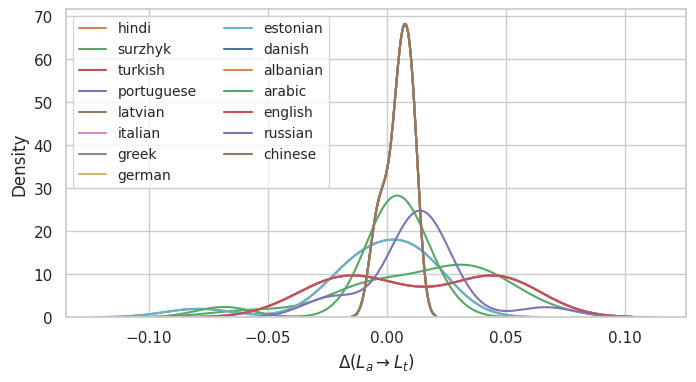

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Use the 'target_lang' variable to color different distribution lines
for lang in temp['aux_lang'].unique():
    sns.kdeplot(temp[temp['aux_lang'] == lang]['delta_auc'], label=lang)

# Set plot labels and title
plt.xlabel(r'$\Delta (L_a \rightarrow L_t)$')
plt.ylabel('Density')
# plt.title(r'Distribution of $\Delta (L_a \rightarrow L_t)$ AUC by Auxiliary Language $L_a$')

# Show the legend
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='small', ncol=2)
plt.savefig('distribution_plot.png', format='png', dpi=300, bbox_inches='tight')


